In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import methylize

# Load data

### Methylation data

In [2]:
meth_data = pd.read_csv('./data/bmiq.norm.data', delimiter='\t')

In [3]:
print(meth_data.shape)
print(meth_data.columns)

(865839, 31)
Index(['Unnamed: 0', 'BB14243', 'TRB003', 'TRB008', 'TRB025', 'BB14206',
       'BB14294', 'BB14277', 'TRB027', 'TRB002', 'BB14254', 'BB1543', 'TRB004',
       'TRB005', 'TRB006', 'TRB007', 'TRB011', 'TRB013', 'TRB016', 'TRB017',
       'TRB024', 'BB14321', 'TRB014', 'BB15324', 'BB15476', 'TRB010', 'TRB021',
       'TRB012', 'BB14303', 'TRB015', 'TRB019'],
      dtype='object')


In [4]:
print(meth_data.head(5))

   Unnamed: 0   BB14243    TRB003    TRB008    TRB025   BB14206   BB14294  \
0  cg00000029  0.488408  0.513697  0.339963  0.551967  0.493545  0.595122   
1  cg00000103  0.942143  0.957152  0.931108  0.938870  0.929103  0.913234   
2  cg00000109  0.942683  0.934911  0.935967  0.918010  0.929693  0.916233   
3  cg00000155  0.970504  0.964514  0.966219  0.947769  0.948426  0.968360   
4  cg00000158  0.974657  0.956582  0.983258  0.974779  0.963490  0.980204   

    BB14277    TRB027    TRB002  ...   BB14321    TRB014   BB15324   BB15476  \
0  0.509102  0.647415  0.428863  ...  0.405404  0.596035  0.551719  0.543236   
1  0.922488  0.938474  0.924874  ...  0.933900  0.936076  0.951369  0.949029   
2  0.917929  0.904633  0.917252  ...  0.917514  0.932682  0.932531  0.929109   
3  0.965477  0.964102  0.965619  ...  0.966357  0.952312  0.965961  0.975819   
4  0.973853  0.967432  0.984966  ...  0.973576  0.971905  0.982986  0.981322   

     TRB010    TRB021    TRB012   BB14303    TRB015    T

### Phenotype data

In [5]:
pheno_data = pd.read_csv('./data/sample_description.csv')
pheno_data = pheno_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
print(pheno_data.shape)

(30, 5)


In [7]:
print(pheno_data.head(5))

     ID Sample.ID  Sample.Group   Sentrix.Barcode  Sentrix.Section
0     1    BB14243        Athero      201438350067          R06C01
1     2     TRB003        Athero      201438350067          R07C01
2     3     TRB008        Athero      201438350067          R08C01
3     4     TRB025        Athero      201438350069          R02C01
4     5    BB14206        Athero      201438350069          R04C01


The function ' diff_meth_pos' searches for individual differentially methylated positions. But it only allows binary phenotypes. So, if we choose 'Sample.Group' as the phenotype of interest, we need to divide the data into three groups: 
  - Athero vs. Cardioembolic
  - Athero vs. Undetermined
  - Cardioembolic vs. Undetermined

# Split data

### Athero info

In [8]:
pheno_group = pheno_data.groupby('Sample.Group ')

# Phenotype data
pheno_athero = pheno_group.get_group('Athero').reset_index(drop=True)
print(pheno_athero)

#Methylation data
samples_athero = list(pheno_athero['Sample.ID '])
samples_athero.insert(0,'Unnamed: 0')
meth_athero = meth_data[samples_athero]
meth_athero.set_index('Unnamed: 0', inplace=True) 
print(meth_athero)

     ID Sample.ID  Sample.Group   Sentrix.Barcode  Sentrix.Section
0     1    BB14243        Athero      201438350067          R06C01
1     2     TRB003        Athero      201438350067          R07C01
2     3     TRB008        Athero      201438350067          R08C01
3     4     TRB025        Athero      201438350069          R02C01
4     5    BB14206        Athero      201438350069          R04C01
5     6    BB14294        Athero      201438350069          R05C01
6     7    BB14277        Athero      201438350070          R02C01
7     8     TRB027        Athero      201438350070          R03C01
             BB14243    TRB003    TRB008    TRB025   BB14206   BB14294  \
Unnamed: 0                                                               
cg00000029  0.488408  0.513697  0.339963  0.551967  0.493545  0.595122   
cg00000103  0.942143  0.957152  0.931108  0.938870  0.929103  0.913234   
cg00000109  0.942683  0.934911  0.935967  0.918010  0.929693  0.916233   
cg00000155  0.970504  0.964

In [9]:
# Phenotype data
pheno_cardioembolic = pheno_group.get_group('Cardioembolic').reset_index(drop=True)
print(pheno_cardioembolic)

#Methylation data
samples_cardioembolic = list(pheno_cardioembolic['Sample.ID '])
samples_cardioembolic.insert(0,'Unnamed: 0')
meth_cardioembolic = meth_data[samples_cardioembolic]
meth_cardioembolic.set_index('Unnamed: 0', inplace=True) 
print(meth_cardioembolic)

      ID Sample.ID   Sample.Group   Sentrix.Barcode  Sentrix.Section
0      9     TRB002  Cardioembolic      201233770147          R07C01
1     10    BB14254  Cardioembolic      201438350061          R03C01
2     11     BB1543  Cardioembolic      201438350061          R04C01
3     12     TRB004  Cardioembolic      201438350061          R05C01
4     13     TRB005  Cardioembolic      201438350061          R06C01
5     14     TRB006  Cardioembolic      201438350061          R07C01
6     15     TRB007  Cardioembolic      201438350061          R08C01
7     16     TRB011  Cardioembolic      201438350067          R01C01
8     17     TRB013  Cardioembolic      201438350067          R02C01
9     18     TRB016  Cardioembolic      201438350067          R03C01
10    19     TRB017  Cardioembolic      201438350067          R04C01
11    20     TRB024  Cardioembolic      201438350067          R05C01
12    21    BB14321  Cardioembolic      201438350069          R03C01
13    22     TRB014  Cardioembolic

In [10]:
# Phenotype data
pheno_undetermined = pheno_group.get_group('Undetermined').reset_index(drop=True)
print(pheno_undetermined)

#Methylation data
samples_undetermined = list(pheno_undetermined['Sample.ID '])
samples_undetermined.insert(0,'Unnamed: 0')
meth_undetermined = meth_data[samples_undetermined]
meth_undetermined.set_index('Unnamed: 0', inplace=True)
print(meth_undetermined)

     ID Sample.ID  Sample.Group   Sentrix.Barcode  Sentrix.Section
0    23    BB15324  Undetermined      201233770147          R06C01
1    24    BB15476  Undetermined      201233770147          R08C01
2    25     TRB010  Undetermined      201438350061          R01C01
3    26     TRB021  Undetermined      201438350061          R02C01
4    27     TRB012  Undetermined      201438350069          R01C01
5    28    BB14303  Undetermined      201438350069          R06C01
6    29     TRB015  Undetermined      201438350069          R07C01
7    30     TRB019  Undetermined      201438350069          R08C01
             BB15324   BB15476    TRB010    TRB021    TRB012   BB14303  \
Unnamed: 0                                                               
cg00000029  0.551719  0.543236  0.242126  0.492469  0.467909  0.584514   
cg00000103  0.951369  0.949029  0.919962  0.918612  0.933549  0.953193   
cg00000109  0.932531  0.929109  0.911420  0.931031  0.936515  0.940228   
cg00000155  0.965961  0.975

# Analysis

## Athero vs. Cardioembolic

In [11]:
phen_A = pd.concat([pheno_athero,pheno_cardioembolic])
#print(phen_A)

meth_A = pd.concat([meth_athero, meth_cardioembolic], axis=1)
#meth_A.set_index('Unnamed: 0', inplace=True) 
print(meth_A)

             BB14243    TRB003    TRB008    TRB025   BB14206   BB14294  \
Unnamed: 0                                                               
cg00000029  0.488408  0.513697  0.339963  0.551967  0.493545  0.595122   
cg00000103  0.942143  0.957152  0.931108  0.938870  0.929103  0.913234   
cg00000109  0.942683  0.934911  0.935967  0.918010  0.929693  0.916233   
cg00000155  0.970504  0.964514  0.966219  0.947769  0.948426  0.968360   
cg00000158  0.974657  0.956582  0.983258  0.974779  0.963490  0.980204   
...              ...       ...       ...       ...       ...       ...   
rs9363764   0.021476  0.965937  0.559635  0.034392  0.495133  0.981808   
rs939290    0.968568  0.597334  0.595481  0.040322  0.970181  0.966589   
rs951295    0.941186  0.056183  0.544151  0.545970  0.938956  0.528612   
rs966367    0.488245  0.965550  0.019917  0.450815  0.965759  0.471485   
rs9839873   0.978977  0.981134  0.672403  0.967743  0.974038  0.976743   

             BB14277    TRB027    TRB

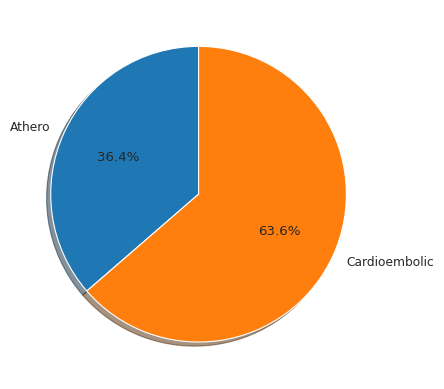

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie((len(pheno_athero), len(pheno_cardioembolic) ), labels=['Athero', 'Cardioembolic'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [13]:
test_results_A = methylize.diff_meth_pos(
    meth_data = meth_A.sample(10000), 
    pheno_data = phen_A['Sample.Group '],
    regression_method = 'logistic'
)

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (22, 10000)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (Athero) was assigned to 0 and (Cardioembolic) was assigned to 1.


Probes:   0%|          | 0/10000 [00:00<?, ?it/s]

In [14]:
test_results_A.head()

,Coefficient,PValue,StandardError,fold_change,95%CI_lower,95%CI_upper,FDR_QValue
cg09143713,-1.416469,0.275064,1.297757,-0.308273,-2.274,-1.925,0.990253
cg02623991,2.178778,0.119355,1.398905,0.697191,-3.669,-3.305,0.990253
cg15633369,-3.668463,0.112778,2.313280,-0.470683,1.982,2.204,0.990253
cg17650523,-2.882672,0.221440,2.357614,-0.314136,-3.626,-3.415,0.990253
cg24775259,-0.495465,0.485432,0.710249,-0.138171,4.056,4.783,0.990253


In [15]:
interesting_probes = test_results_A[test_results_A['PValue'] <= 0.05]
interesting_probes.head()

,Coefficient,PValue,StandardError,fold_change,95%CI_lower,95%CI_upper,FDR_QValue
cg13347608,-8.642505,0.023078,3.803696,-0.977460,1.081,1.268,0.990253
cg16795759,-17.329942,0.021185,7.519498,-0.818345,1.669,1.784,0.990253
cg01823866,-6.207236,0.027185,2.810160,-0.804619,2.758,3.055,0.990253
cg16906375,-5.668731,0.045575,2.835341,-0.697961,-4.372,-4.172,0.990253
cg20653383,-7.732793,0.011225,3.049662,-1.187055,0.289,0.508,0.990253


In [53]:
ID = ['cg00056066', 'cg00191853', 'cg00192046', 'cg00836161', 'cg00843795', 'cg01311063', 'cg01479912', 
      'cg01615050', 'cg01758122','cg01802772','cg02179473','cg02288165','cg02484732','cg02622647',
      'cg02627240','cg02627872','cg02691506','cg02839725','cg03012280','cg03615426','cg04073914',
      'cg04105547','cg04438098','cg04464523','cg04520693','cg04692312','cg05023192','cg05321907',
      'cg05392160','cg05475474','cg05519582','cg05741563','cg05971102','cg06083932','cg06293782',
      'cg06339338','cg06430688','cg06590444','cg06631775','cg06737250','cg07195891','cg07203999',
      'cg07374109','cg07456585','cg07665217','cg07712165','cg08006646','cg08043513','cg08138245',
      'cg08331829','cg08421632','cg08461876','cg08477332','cg08570077','cg08775595','cg08944170',
      'cg09539170','cg09672255','cg09733528','cg09957458','cg10662395','cg10701801','cg11144103',
      'cg11227702','cg11705504','cg12340462','cg12381531','cg12386614','cg12515659','cg12908908',
      'cg12957945','cg13038195','cg13431688','cg13739190','cg13883027','cg14001750','cg14564293',
      'cg14599155','cg15535896','cg15546285','cg15909443','cg16020483','cg16098618','cg16377948',
      'cg16402757','cg16674380','cg16787259','cg16788319','cg16791832','cg16810310','cg16932018',
      'cg17256465','cg17314580','cg17330938','cg17388779','cg17970043','cg18266588','cg18523915',
      'cg18580559','cg18707028','cg18751375','cg18816122','cg18857647','cg19274180','cg19405842',
      'cg19949776','cg19978674','cg20315590','cg20336007','cg20433858','cg20507276','cg20592836',
      'cg20744163','cg20890325','cg21015022','cg22237644','cg22953237','cg23421392','cg23564471',
      'cg24065597','cg25322986','cg25342508','cg25498107','cg25536002','cg25601713','cg25627920',
      'cg26081710','cg26167301','cg26217827','cg27056740', 'cg27224751']

for f in test_results_A.index.values:
    for i in ID:
        if i == f:
            print(i)
            print(test_results_A[test_results_A.index.values == i])
            
#print(test_results_A.index.values == 'cg00056066')

cg04105547
            Coefficient    PValue  StandardError  fold_change  95%CI_lower  \
cg04105547    -0.376213  0.081415         0.2159    -0.783327        0.224   

            95%CI_upper  FDR_QValue  minuslog10value chromosome       MAPINFO  
cg04105547        2.843    0.990253         1.089296         16  CHR-915857.0  
cg08043513
            Coefficient    PValue  StandardError  fold_change  95%CI_lower  \
cg08043513    -0.393601  0.046103       0.197348     -0.56527        0.183   

            95%CI_upper  FDR_QValue  minuslog10value chromosome  \
cg08043513        3.148    0.990253         1.336273         17   

                   MAPINFO  
cg08043513  CHR-42070433.0  
cg10662395
            Coefficient    PValue  StandardError  fold_change  95%CI_lower  \
cg10662395     1.131088  0.048516       0.573334      1.62636        -0.28   

            95%CI_upper  FDR_QValue  minuslog10value chromosome       MAPINFO  
cg10662395        0.863    0.990253         1.314119         19

4 NaNs dropped
Error: No significant probes (FDR line omitted from plot)


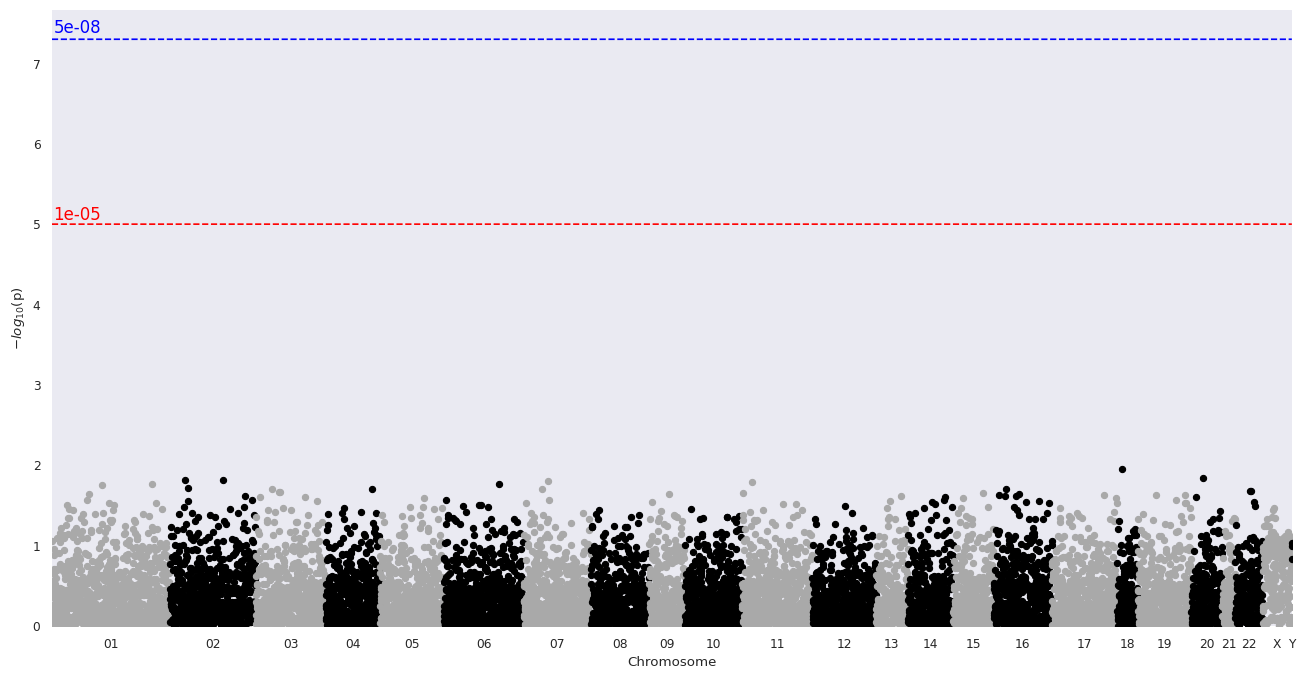

In [16]:
# Manhattan plot
methylize.manhattan_plot(test_results_A, array_type = 'epic', plot_cutoff_label = 0.05)

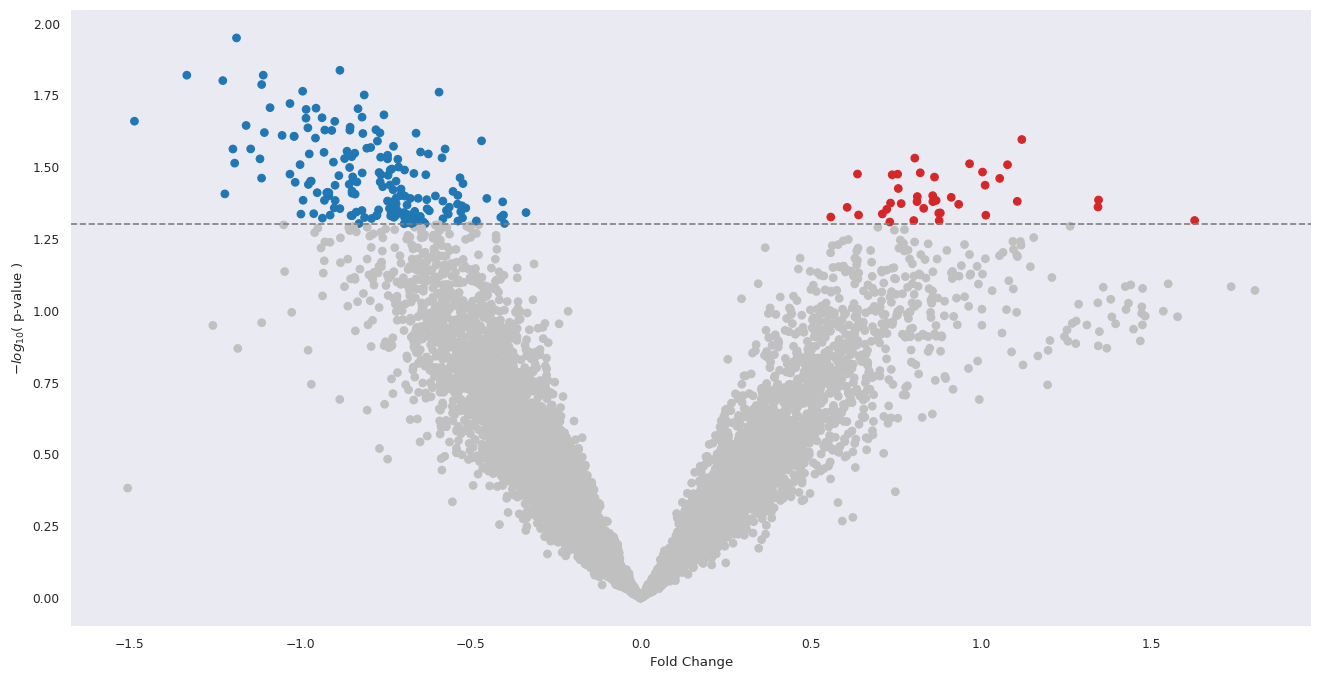

In [17]:
# Volcano plot
methylize.volcano_plot(test_results_A)

## Athero vs. Undetermined

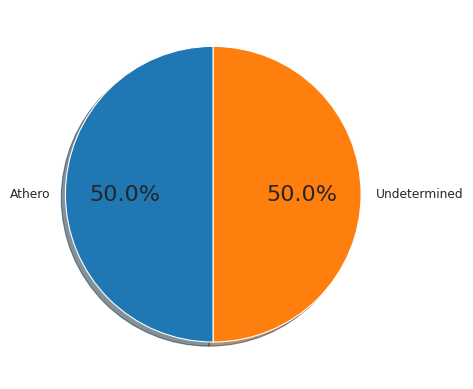

In [22]:
phen_B = pd.concat([pheno_athero,pheno_undetermined])
#print(phen_B)

meth_B = pd.concat([meth_athero, meth_undetermined], axis=1)
#print(meth_B)

fig2, ax2 = plt.subplots()
ax2.pie((len(pheno_athero), len(pheno_undetermined) ), labels=['Athero', 'Undetermined'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [23]:
test_results_B = methylize.diff_meth_pos(
    meth_data = meth_B.sample(10000), 
    pheno_data = phen_B['Sample.Group '],
    regression_method = 'logistic'
)
test_results_B.head()

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (16, 10000)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (Athero) was assigned to 0 and (Undetermined) was assigned to 1.


Probes:   0%|          | 0/10000 [00:00<?, ?it/s]

1 probes failed the logistic regression analysis due to perfect separation and could not be included in the final results.
Error Probes:
cg08866213


,Coefficient,PValue,StandardError,fold_change,95%CI_lower,95%CI_upper,FDR_QValue
cg01938725,0.112051,0.960543,2.264947,0.024295,3.106,3.349,0.999756
cg27523547,0.188986,0.899269,1.492956,0.048842,4.685,5.054,0.999756
cg27120568,-0.388775,0.789629,1.457223,-0.127779,3.088,3.467,0.999756
cg05126887,0.826869,0.658454,1.870537,0.215326,-3.851,-3.550,0.999756
cg18808825,-2.128618,0.296516,2.039037,-0.411333,3.625,3.917,0.999756


In [24]:
interesting_probes_B = test_results_B[test_results_B['PValue'] <= 0.05]
interesting_probes_B.head()

,Coefficient,PValue,StandardError,fold_change,95%CI_lower,95%CI_upper,FDR_QValue
cg09208942,7.489144,0.026777,3.381469,1.008766,2.577,2.907,0.999756
cg00110041,18.335887,0.033888,8.643312,1.203356,1.579,1.696,0.999756
cg11607342,4.094860,0.046696,2.058702,0.986094,2.493,2.951,0.999756
cg25640389,-15.411281,0.038450,7.444963,-1.008862,3.086,3.271,0.999756
cg21552104,3.206862,0.046736,1.612556,0.866104,1.739,2.265,0.999756


5 NaNs dropped
Error: No significant probes (FDR line omitted from plot)


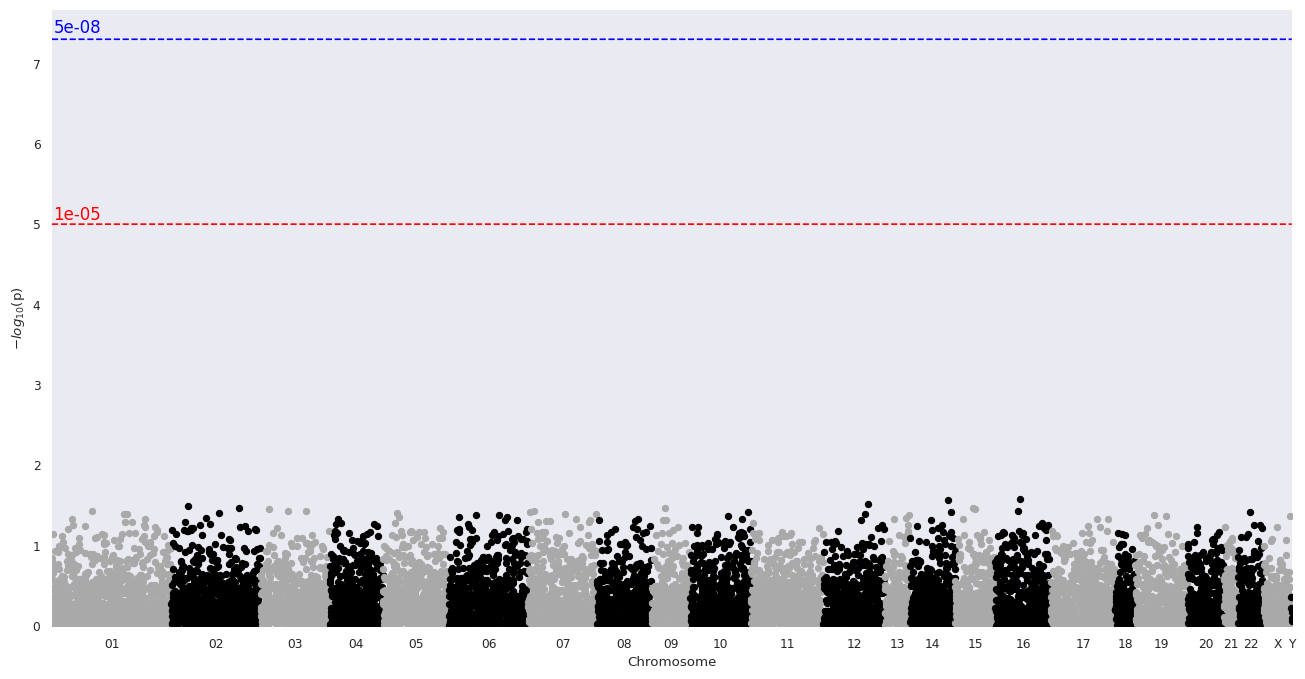

In [25]:
# Manhattan plot
methylize.manhattan_plot(test_results_B, array_type = 'epic', plot_cutoff_label = 0.05)

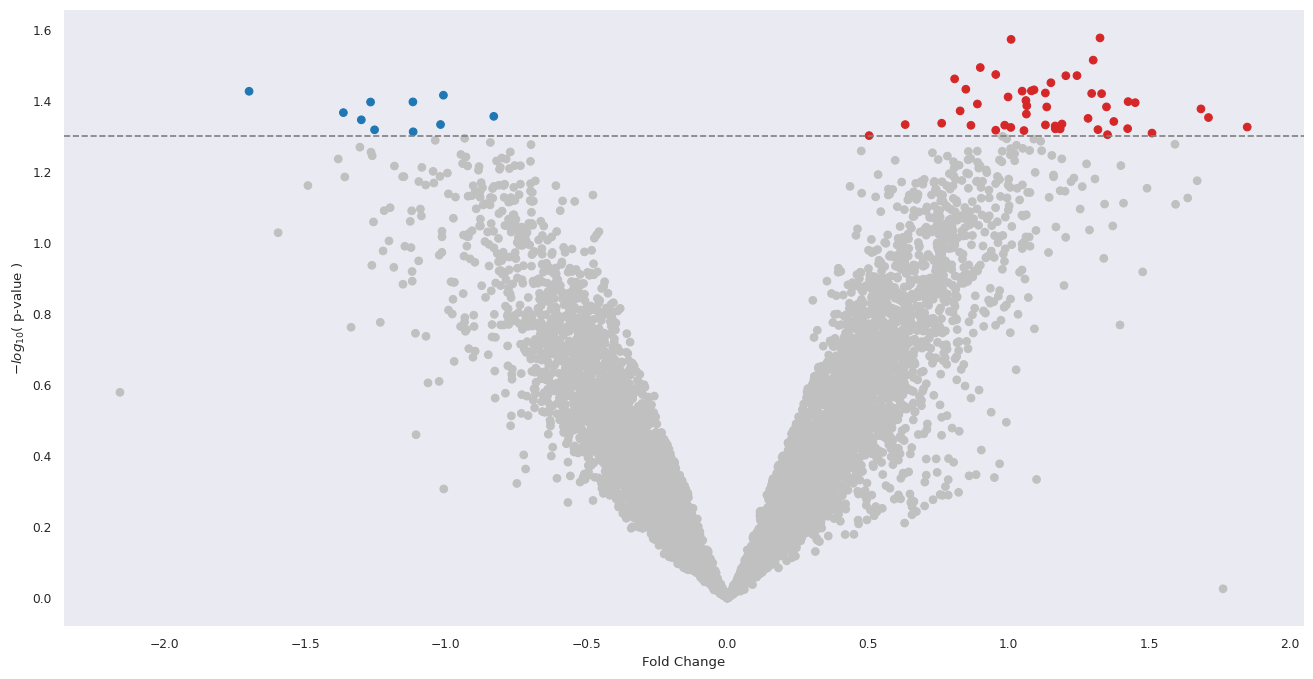

In [26]:
# Volcano plot
methylize.volcano_plot(test_results_B)

## Cardioembolic vs. Undetermined

      ID Sample.ID   Sample.Group   Sentrix.Barcode  Sentrix.Section
0      9     TRB002  Cardioembolic      201233770147          R07C01
1     10    BB14254  Cardioembolic      201438350061          R03C01
2     11     BB1543  Cardioembolic      201438350061          R04C01
3     12     TRB004  Cardioembolic      201438350061          R05C01
4     13     TRB005  Cardioembolic      201438350061          R06C01
5     14     TRB006  Cardioembolic      201438350061          R07C01
6     15     TRB007  Cardioembolic      201438350061          R08C01
7     16     TRB011  Cardioembolic      201438350067          R01C01
8     17     TRB013  Cardioembolic      201438350067          R02C01
9     18     TRB016  Cardioembolic      201438350067          R03C01
10    19     TRB017  Cardioembolic      201438350067          R04C01
11    20     TRB024  Cardioembolic      201438350067          R05C01
12    21    BB14321  Cardioembolic      201438350069          R03C01
13    22     TRB014  Cardioembolic

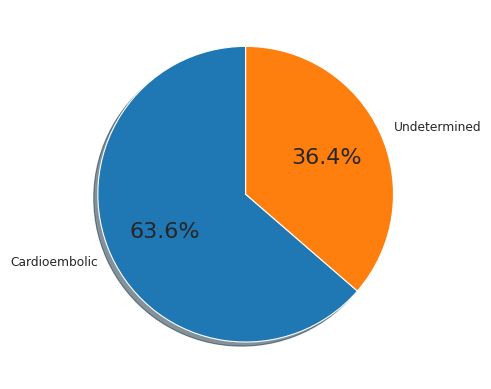

In [30]:
phen_C = pd.concat([pheno_cardioembolic,pheno_undetermined])
#print(phen_C)

meth_C = pd.concat([meth_cardioembolic, meth_undetermined], axis=1)
#print(meth_C)

fig3, ax3 = plt.subplots()
ax3.pie((len(pheno_cardioembolic), len(pheno_undetermined) ), labels=['Cardioembolic', 'Undetermined'], 
        autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [32]:
test_results_C = methylize.diff_meth_pos(
    meth_data = meth_C.sample(10000), 
    pheno_data = phen_C['Sample.Group '],
    regression_method = 'logistic'
)
test_results_C.head()

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (22, 10000)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (Undetermined) was assigned to 0 and (Cardioembolic) was assigned to 1.


Probes:   0%|          | 0/10000 [00:00<?, ?it/s]

,Coefficient,PValue,StandardError,fold_change,95%CI_lower,95%CI_upper,FDR_QValue
cg20817941,-1.316032,0.601049,2.516830,-0.186164,0.424,0.585,0.999822
cg01658782,0.570268,0.637146,1.208982,0.171171,3.727,4.074,0.999822
cg05948101,-1.315033,0.285154,1.230368,-0.233973,2.272,2.676,0.999822
cg17798654,0.202371,0.891474,1.483236,0.053628,4.467,4.739,0.999822
cg19685436,-0.591541,0.690022,1.483211,-0.174451,1.939,2.208,0.999822


In [33]:
interesting_probes_C = test_results_C[test_results_C['PValue'] <= 0.05]
interesting_probes_C.head()

,Coefficient,PValue,StandardError,fold_change,95%CI_lower,95%CI_upper,FDR_QValue
cg05776899,-10.835435,0.013706,4.395924,-0.963211,-0.273,-0.034,0.999822
cg17326451,-4.077960,0.028025,1.856204,-0.880441,0.582,0.939,0.999822
cg27518016,-3.739980,0.047904,1.890583,-0.776745,-2.492,-2.213,0.999822
cg05673765,-5.619786,0.048635,2.850111,-0.744577,1.293,1.590,0.999822
cg11813489,-9.677309,0.020506,4.176714,-0.722166,0.541,0.784,0.999822


9 NaNs dropped
Error: No significant probes (FDR line omitted from plot)


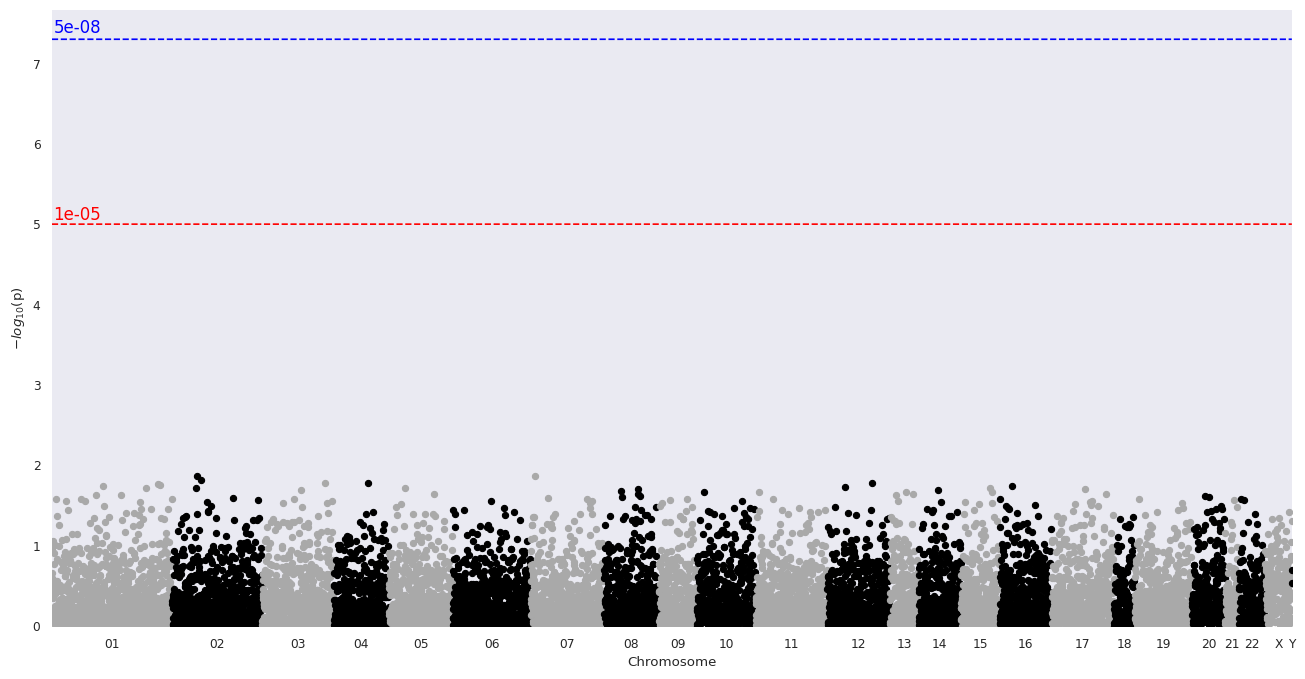

In [34]:
# Manhattan plot
methylize.manhattan_plot(test_results_C, array_type = 'epic', plot_cutoff_label = 0.05)

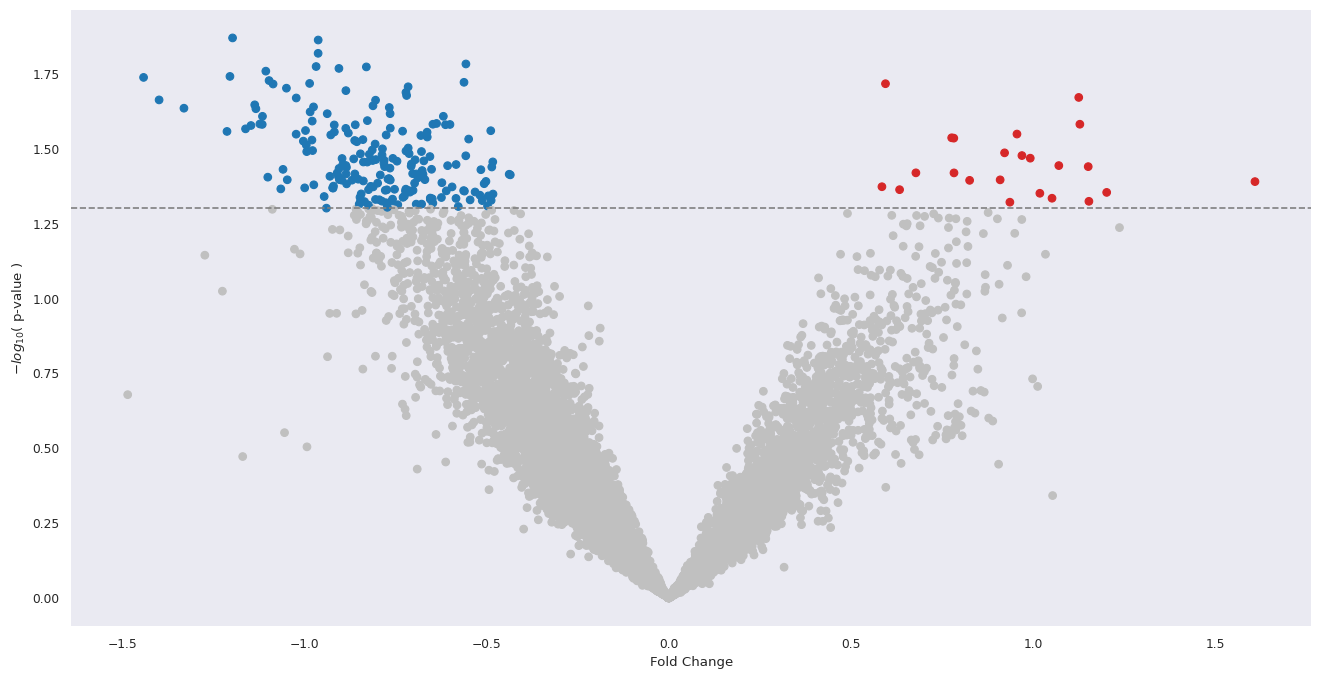

In [35]:
# Volcano plot
methylize.volcano_plot(test_results_C)